## Importing libraries and data


In [1]:
import pandas as pd
import numpy as np
import folium
from folium import plugins, branca
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import scipy.stats as stats

warnings.filterwarnings("ignore")
sns.set_style("whitegrid")
sns.set_context("talk")

pd.set_option("display.max_columns", None)
pd.set_option("display.float_format", lambda x: "%.4f" % x)

In [2]:
city = "montreal"

In [3]:
data = pd.read_csv(f"data/{city}.csv")
data.head()


,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,534948,https://www.airbnb.com/rooms/534948,20230902231108,2023-09-03,city scrape,Rental unit in Montreal · ★4.83 · 2 bedrooms ·...,<b>The space</b><br />The apartment is fully e...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,1610679,https://www.airbnb.com/users/show/1610679,Edward,2012-01-15,"Bissau, Guinea-Bissau","Hey, I'm from Montreal , Canada .. fascinati...",within a few hours,100%,56%,t,https://a0.muscache.com/im/users/1610679/profi...,https://a0.muscache.com/im/users/1610679/profi...,Little Burgundy,3,4,"['email', 'phone', 'work_email']",t,t,NaN,Le Sud-Ouest,NaN,45.4873,-73.5733,Entire rental unit,Entire home/apt,4,NaN,1 bath,2.0000,2.0000,"[""Bed linens"", ""Outdoor dining area"", ""Resort ...",$88.00,31,62,31,31,62,62,31.0000,62.0000,NaN,t,3,27,56,56,2023-09-03,6,2,1,2013-01-16,2023-09-01,4.8300,4.6700,4.5000,4.5000,5.0000,4.8300,4.8300,NaN,f,1,1,0,0,0.0500
1,542160,https://www.airbnb.com/rooms/542160,20230902231108,2023-09-03,city scrape,Condo in Montreal · ★4.77 · 1 bedroom · 1 bed ...,<b>The space</b><br />I am renting my lovely c...,"Le plateau Mont-Royal is in my opinion, the be...",https://a0.muscache.com/pictures/29641965/040b...,2666170,https://www.airbnb.com/users/show/2666170,Alex,2012-06-17,"Montreal, Canada",Hello!\r\n\r\nI am a film/travel tv series dir...,within a day,50%,57%,f,https://a0.muscache.com/im/pictures/user/e4efc...,https://a0.muscache.com/im/pictures/user/e4efc...,Le Plateau,3,6,"['email', 'phone', 'work_email']",t,t,"Montreal, Quebec, Canada",Le Plateau-Mont-Royal,NaN,45.5367,-73.5814,Entire condo,Entire home/apt,2,NaN,1 bath,1.0000,1.0000,"[""Shampoo"", ""Wifi"", ""Oven"", ""Patio or balcony""...",$91.00,31,1125,31,31,1125,1125,31.0000,1125.0000,NaN,t,2,16,26,274,2023-09-03,192,8,1,2014-05-20,2023-08-19,4.7700,4.8000,4.8200,4.9500,4.8900,4.6800,4.7800,"284723, expires: 2024-06-30",f,2,2,0,0,1.7000
2,556742,https://www.airbnb.com/rooms/556742,20230902231108,2023-09-03,city scrape,Rental unit in Montreal · ★4.83 · 2 bedrooms ·...,The building is occupied by families mostly. T...,"This neighborhood is our favorite, the Avenue ...",https://a0.muscache.com/pictures/9263006/946af...,2737452,https://www.airbnb.com/users/show/2737452,Carole,2012-06-25,"Montreal, Canada","Nous sommes une famille, nous avons fait l'acq...",within a few hours,100%,100%,t,https://a0.muscache.com/im/users/2737452/profi...,https://a0.muscache.com/im/users/2737452/profi...,Le Plateau,2,2,"['email', 'phone', 'work_email']",t,t,"Montreal, Quebec, Canada",Le Plateau-Mont-Royal,NaN,45.5309,-73.5685,Entire rental unit,Entire home/apt,4,NaN,1 bath,2.0000,2.0000,"[""Bed linens"", ""Self check-in"", ""Private entra...

## Exploratory data analysis


In [4]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7933 entries, 0 to 7932
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            7933 non-null   int64  
 1   listing_url                                   7933 non-null   object 
 2   scrape_id                                     7933 non-null   int64  
 3   last_scraped                                  7933 non-null   object 
 4   source                                        7933 non-null   object 
 5   name                                          7933 non-null   object 
 6   description                                   7887 non-null   object 
 7   neighborhood_overview                         4298 non-null   object 
 8   picture_url                                   7933 non-null   object 
 9   host_id                                       7933 non-null   i

In [5]:
object_to_dtype = {
    "host_since": "datetime64[ns]",
    "host_response_rate": "float",
    "host_acceptance_rate": "float",
    "host_is_superhost": "bool",
    "host_has_profile_pic": "bool",
    "host_identity_verified": "bool",
    "instant_bookable": "bool",
    "has_availability": "bool",
}

for col, dtype in object_to_dtype.items():
    if dtype == "float":
        data[col] = data[col].str.replace("%", "").astype(dtype)
    elif dtype == "bool":
        data[col] = data[col].map({"t": True, "f": False}).astype(dtype)
    elif dtype == "datetime64[ns]":
        data[col] = pd.to_datetime(data[col])
    else:
        raise ValueError(f"Unknown dtype: {dtype}")

In [6]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7933 entries, 0 to 7932
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype         
---  ------                                        --------------  -----         
 0   id                                            7933 non-null   int64         
 1   listing_url                                   7933 non-null   object        
 2   scrape_id                                     7933 non-null   int64         
 3   last_scraped                                  7933 non-null   object        
 4   source                                        7933 non-null   object        
 5   name                                          7933 non-null   object        
 6   description                                   7887 non-null   object        
 7   neighborhood_overview                         4298 non-null   object        
 8   picture_url                                   7933 non-null   object

In [7]:
# Convert daily price in local currency to float
data["price"] = data["price"].str.replace(r"(\$|,)", "").astype(float)

In [8]:
# Clean up the amenities column
data["amenities"] = data["amenities"].str.replace(r"\[|\]|\"", "")

In [9]:
# Remove outliers (price > 95% quantile)
data_cleaned = data[
    (data["price"] < data["price"].quantile(0.95)) & (data["minimum_nights"] <= 365)
]
print(f"Rows dropped: {data.shape[0] - data_cleaned.shape[0]}")

Rows dropped: 410


In [10]:
# Extract numerical value from `bathrooms_text` column
data_cleaned["bathrooms"] = (
    data["bathrooms_text"].str.extract("(\d+\.?\d*)", expand=False).astype(float)
)

# Create new column `bathrooms_is_shared` indicating if bathroom is shared or not
data_cleaned["bathrooms_is_shared"] = data["bathrooms_text"].str.contains(
    "shared", case=False
).astype(bool)


In [11]:
# Fill NAs for bedrooms with median value of bedrooms by neighbourhood
data_cleaned["bedrooms"] = data_cleaned.groupby("neighbourhood_cleansed")[
    "bedrooms"
].transform(lambda x: x.fillna(x.median()))


In [12]:
# Add a column for number of key amenities provided
list_of_amenities = (
    data_cleaned["amenities"]
    .str.split(", ")
    .explode()
    .value_counts()
    .to_frame()
    .reset_index()
)

top_20_amenities = list_of_amenities.head(20)["index"].to_list()

data_cleaned["num_amenities"] = (
    data_cleaned["amenities"]
    .apply(lambda x: x.split(", "))
    .apply(lambda y: len(set(y).intersection(set(top_20_amenities))))
)


In [13]:
amenities_dummies = (
    data_cleaned["amenities"]
    .apply(lambda x: ";".join(set(x.split(", ")).intersection(set(top_20_amenities))))
    .str.get_dummies(sep=";")
)

data_cleaned = pd.concat([data_cleaned, amenities_dummies], axis=1)

### What is the distribution of listing prices?

As we can see, there are no null values in the price column, but there appear to be some outliers in the data. Let's remove the listings with daily prices above the 95th percentile and see what the distribution looks like.


In [14]:
data["price"].describe()

count     7933.0000
mean       205.8176
std       1276.0679
min         14.0000
25%         80.0000
50%        130.0000
75%        219.0000
max     110526.0000
Name: price, dtype: float64

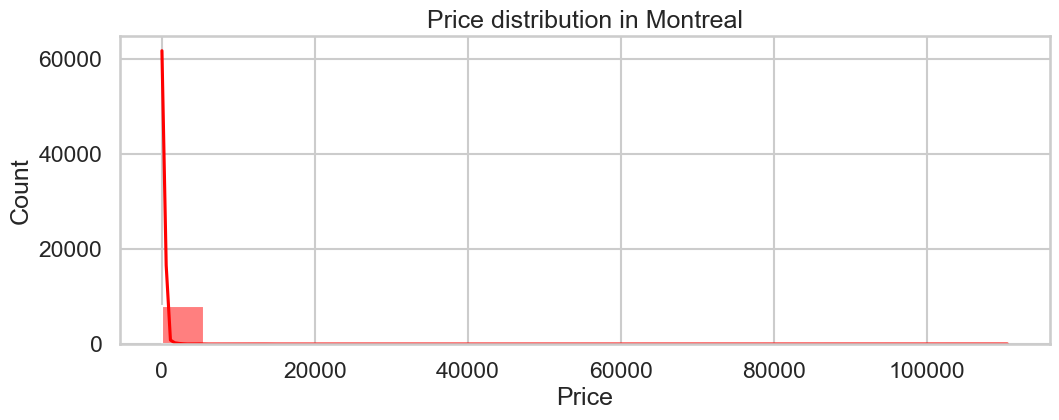

In [15]:
plt.figure(figsize=(12, 4))
ax = sns.histplot(data=data, x="price", color="r", bins=20, kde=True)
ax.set_title(f"Price distribution in {city.capitalize()}")
ax.set_xlabel("Price")
plt.show()


#### Outliers removed

After removing the outliers, the distribution of listing prices looks much more normal.

The average price is $150 per night, with a standard deviation of ~$95. The distribution is slightly skewed to the right, which is expected with price data as there could be a fewer number of "luxury" listings that are much more expensive than the average listing.


To aid in future feature selection, we will add the log of the price as a new column in the dataframe.

In [16]:
data_cleaned["log_price"] = np.log(data_cleaned["price"])

In [17]:
data_cleaned["price"].describe()

count   7523.0000
mean     149.9355
std       94.2936
min       14.0000
25%       79.0000
50%      125.0000
75%      200.0000
max      467.0000
Name: price, dtype: float64

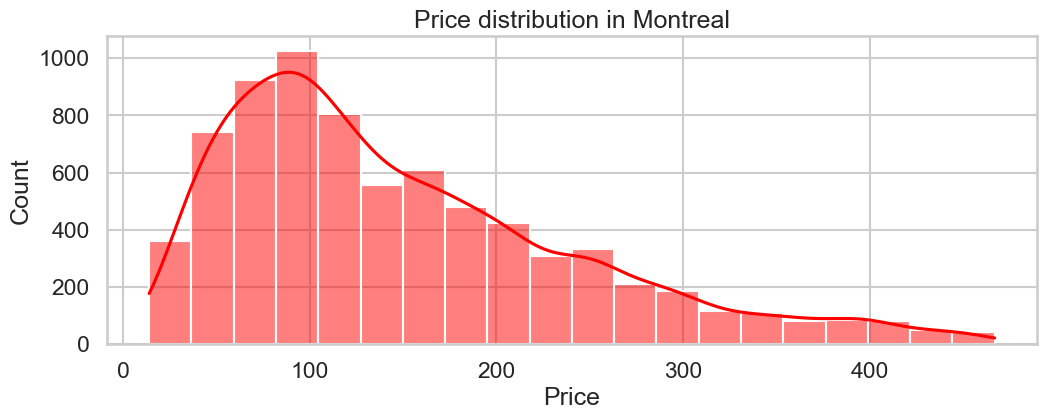

In [18]:
plt.figure(figsize=(12, 4))
ax = sns.histplot(data=data_cleaned, x="price", color="r", bins=20, kde=True)
ax.set_title(f"Price distribution in {city.capitalize()}")
ax.set_xlabel("Price")
plt.show()


### What is the relationship between the location of the listing (neighborhood) and the price?

We see that most listings are in the neighborhoods of Ville-Marie, Le Plateau-Mont-Royal, Le Sud-Ouest, Côte-des-Neiges-Notre-Dame-de-Grâce, Rosemont-La Petite-Patrie and Mercier-Hochelaga-Maisonneuve.


In [19]:
# First, we check the `neighbourhood_cleansed` column
num_listings_by_neighborhood = (
    data_cleaned["neighbourhood_cleansed"]
    .value_counts()
    .to_frame()
    .reset_index()
    .rename(columns={"index": "neighbourhood", "neighbourhood_cleansed": "count"})
)

num_listings_by_neighborhood.style.background_gradient(
    sns.light_palette("red", as_cmap=True)
).set_properties(**{"text-align": "center"}).set_table_styles(
    [
        dict(selector="th", props=[("text-align", "center")]),
        dict(
            selector="caption", props=[("font-size", "14px"), ("font-weight", "bold")]
        ),
    ],
).hide_index().set_caption(
    f"Number of listings by neighborhood in {city.capitalize()}"
).relabel_index(
    {0: "Neighborhood", 1: "# of listings"},
    axis="columns",
)


Neighborhood,# of listings
Ville-Marie,2260
Le Plateau-Mont-Royal,1620
Le Sud-Ouest,617
Côte-des-Neiges-Notre-Dame-de-Grâce,561
Rosemont-La Petite-Patrie,546
Mercier-Hochelaga-Maisonneuve,511
Villeray-Saint-Michel-Parc-Extension,336
Ahuntsic-Cartierville,214
Verdun,192
Saint-Laurent,122


#### Distribution of price by neighborhood

We can check the average price of the top 15 neighborhoods with the most listings. We see that the average price is highest in Outremont, followed by Ville-Marie and Le Plateau-Mont-Royal.


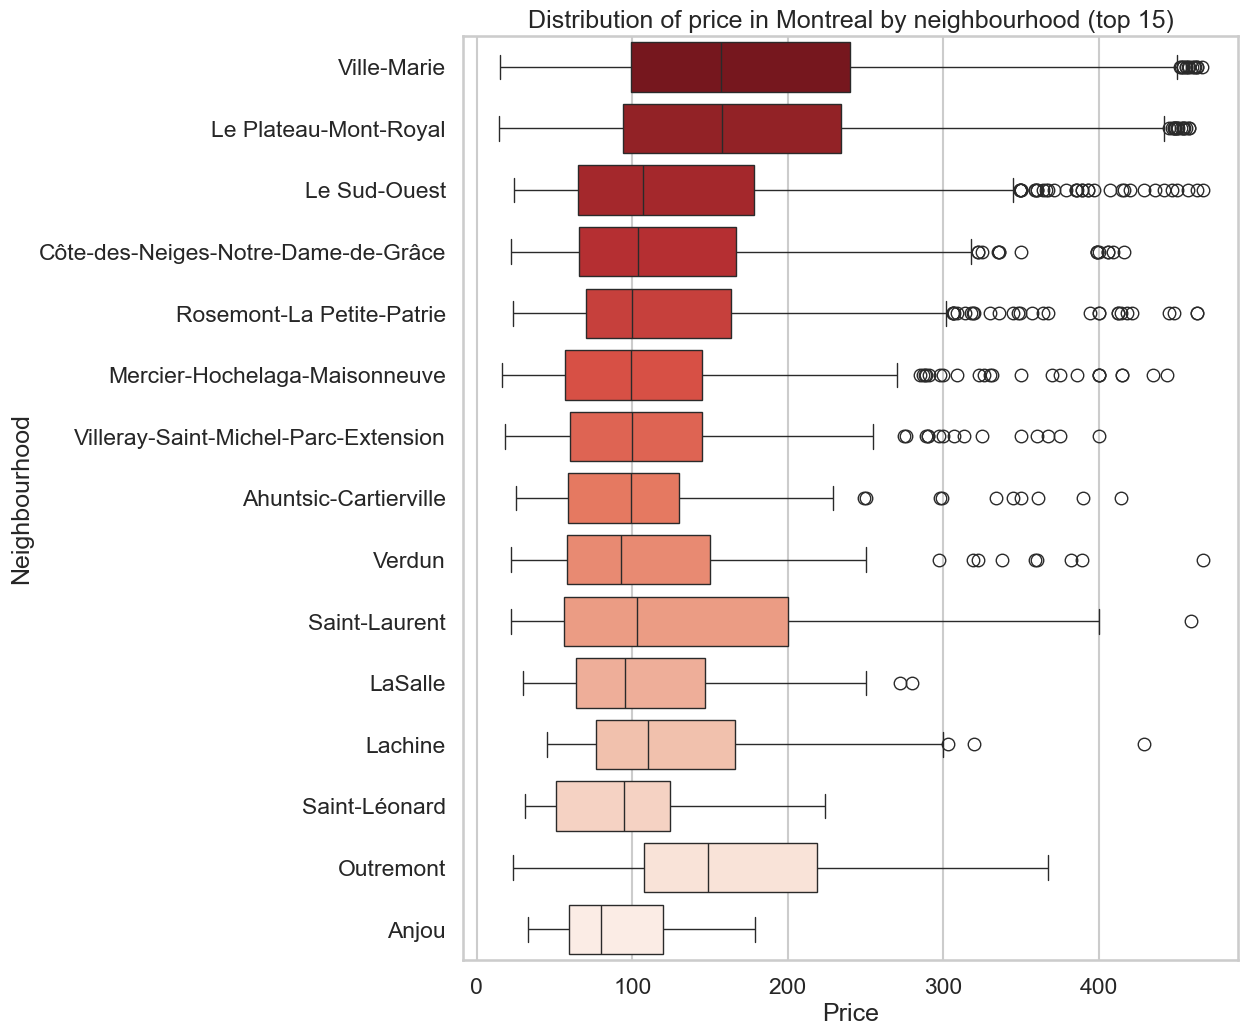

In [20]:
# Then, we see the price of listings in the top 15 neighbourhoods
plt.figure(figsize=(10, 12))
ax = sns.boxplot(
    data=data_cleaned[
        data_cleaned["neighbourhood_cleansed"].isin(
            num_listings_by_neighborhood.iloc[:15].neighbourhood.values
        )
    ],
    y="neighbourhood_cleansed",
    x="price",
    order=num_listings_by_neighborhood.iloc[:15].neighbourhood.values,
    palette="Reds_r",
)
ax.set_title(f"Distribution of price in {city.capitalize()} by neighbourhood (top 15)")
ax.set_ylabel("Neighbourhood")
ax.set_xlabel("Price")
plt.show()

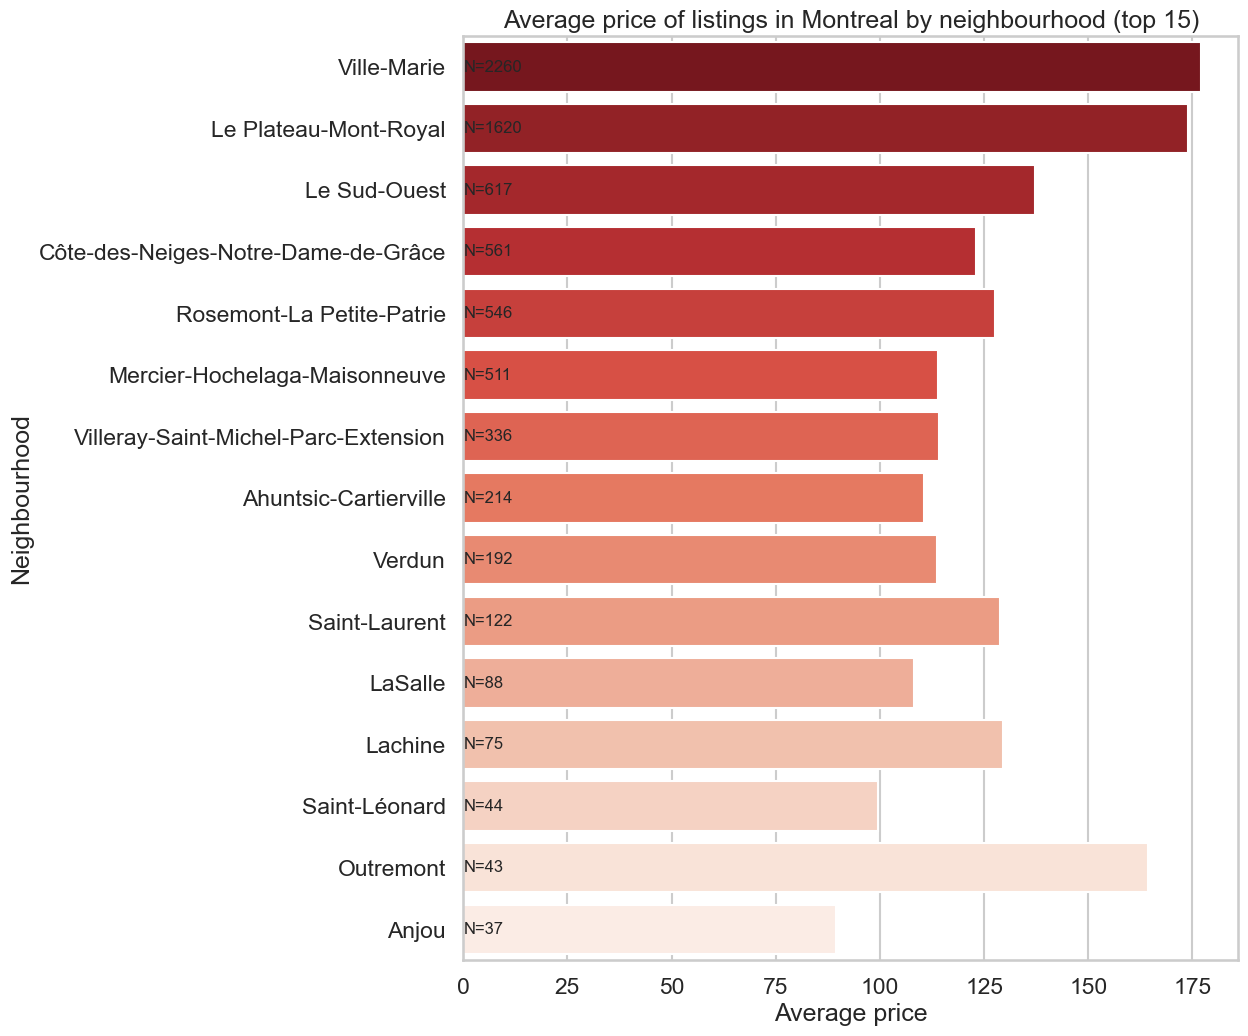

In [21]:
# Finally, we plot the mean price of listings in the top 15 neighbourhoods
avg_price_by_neighborhood = (
    (
        data_cleaned[
            data_cleaned["neighbourhood_cleansed"].isin(
                num_listings_by_neighborhood.iloc[:15].neighbourhood.values
            )
        ]
        .groupby("neighbourhood_cleansed")["price"]
        .agg(["mean", "count"])
    )
    .reindex(index=num_listings_by_neighborhood.iloc[:15].neighbourhood.values)
    .reset_index()
)

plt.figure(figsize=(10, 12))
ax = sns.barplot(
    avg_price_by_neighborhood,
    y="neighbourhood_cleansed",
    x="mean",
    order=num_listings_by_neighborhood.iloc[:15].neighbourhood.values,
    palette="Reds_r",
)

for i in range(15):
    ax.text(
        0,
        i,
        f"N={avg_price_by_neighborhood.iloc[i]['count']}",
        va="center",
        fontsize=12,
    )

ax.set_title(
    f"Average price of listings in {city.capitalize()} by neighbourhood (top 15)"
)
ax.set_ylabel("Neighbourhood")
ax.set_xlabel("Average price")
plt.show()


The average price does vary by neighborhood, indicating that the location of the listing is an important factor in determining the price. We can conduct a statistical test to see if the difference in average price between neighborhoods is significant.

Since we have more than two groups, we will use [ANOVA](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f_oneway.html) to test if the difference in average price between neighborhoods is significant.


In [22]:
f_stat, p_value = stats.f_oneway(
    *data_cleaned.groupby("neighbourhood_cleansed")["price"]
    .apply(list)
    .reset_index()["price"]
    .values
)

print(f"f-statistic: {f_stat}")
print(f"p-value: {p_value}")


f-statistic: 22.135190121516107
p-value: 1.1502741900311699e-125


Since the computed p-value is less than 0.05, we can reject the null hypothesis that the average price is the same across all neighborhoods. This means that the difference in average price between neighborhoods is statistically significant.


### How does the type of property (apartment, house, private room, shared room) affect the price?

We see that most listings are for entire apartments/houses, followed by private rooms. We can double-click on the legend to hide/show the different property types.


In [23]:
# First, we check the `room_type` column
num_listings_by_room_type = (
    data_cleaned["room_type"]
    .value_counts()
    .to_frame()
    .reset_index()
    .rename(columns={"index": "room_type", "room_type": "count"})
)

num_listings_by_room_type.style.background_gradient(
    sns.light_palette("red", as_cmap=True)
).set_properties(**{"text-align": "center"}).set_table_styles(
    [
        dict(selector="th", props=[("text-align", "center")]),
        dict(
            selector="caption", props=[("font-size", "14px"), ("font-weight", "bold")]
        ),
    ],
).hide_index().set_caption(
    f"Number of listings by room type in {city.capitalize()}"
).relabel_index(
    {0: "Room type", 1: "# of listings"},
    axis="columns",
)


Room type,# of listings
Entire home/apt,6149
Private room,1304
Shared room,55
Hotel room,15


Within the "Entire home/apt" room type, ~72% of the listings are for the entire unit. This indicates that the `property_type` column is redundant, and we can directly use `room_type` as a feature in our model.


In [24]:
data_cleaned[data_cleaned["room_type"] == "Entire home/apt"][
    "property_type"
].value_counts(normalize=True).to_frame()


,property_type
Entire rental unit,0.7193
Entire condo,0.1483
Entire loft,0.0475
Entire home,0.0345
Entire serviced apartment,0.0185
Entire townhouse,0.0138
Entire guest suite,0.0052
Room in aparthotel,0.0047
Entire bungalow,0.0023
Entire cottage,0.0013


#### Distribution of price by room type


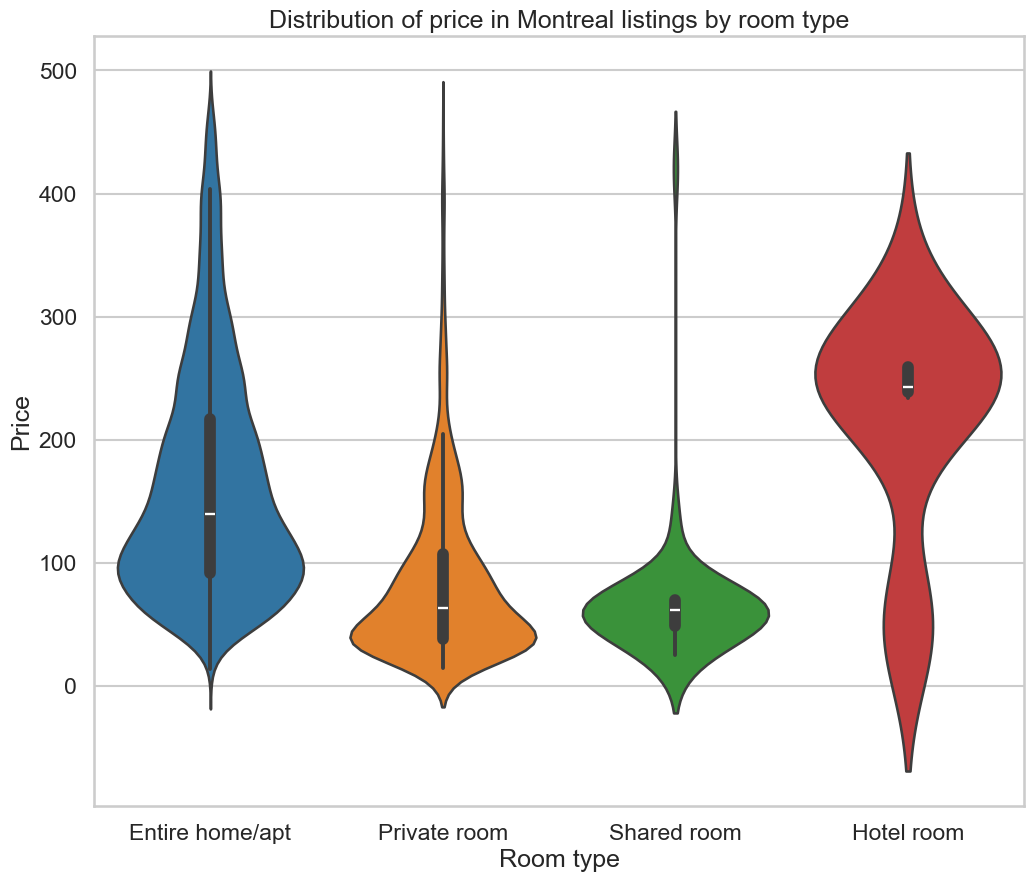

In [25]:
plt.figure(figsize=(12, 10))
ax = sns.violinplot(
    data=data_cleaned,
    x="room_type",
    y="price",
    hue="room_type",
    order=num_listings_by_room_type.room_type.values,
)
ax.set_title(f"Distribution of price in {city.capitalize()} listings by room type")
ax.set_ylabel("Price")
ax.set_xlabel("Room type")
plt.show()


### What is the impact of the number of bedrooms and bathrooms on the price?

There are a lot of listings with missing values for the number of bedrooms. We can impute the missing values using the median value for the neighborhood.


In [26]:
# Check for missing values
data[["bedrooms", "beds"]].isnull().sum()


bedrooms    1787
beds          79
dtype: int64

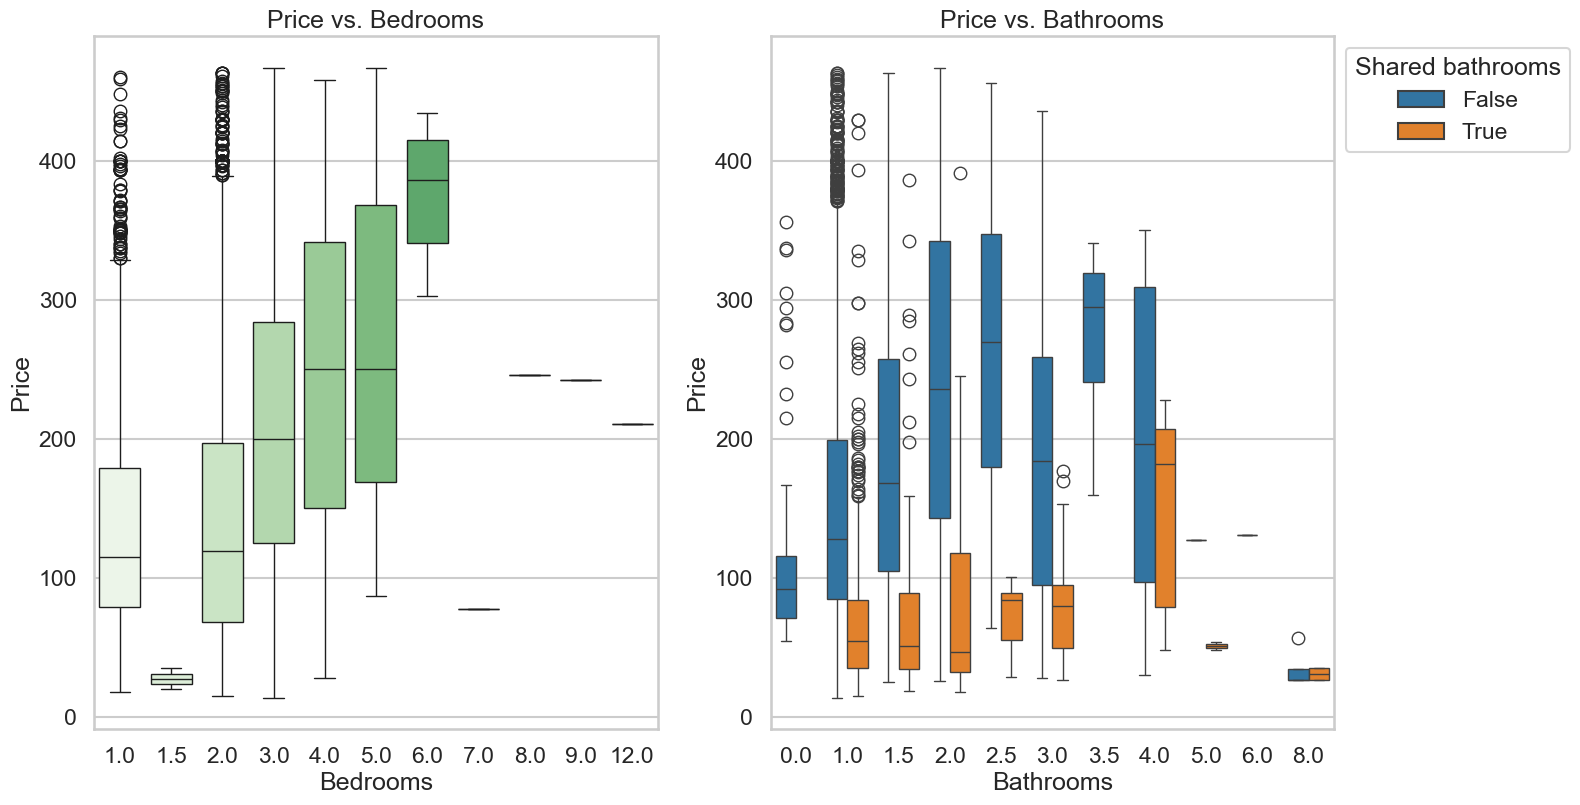

In [27]:
plt.figure(figsize=(16, 9))

plt.subplot(1, 2, 1)
ax1 = sns.boxplot(data=data_cleaned, x="bedrooms", y="price", palette="Greens")
ax1.set_title("Price vs. Bedrooms")
ax1.set_xlabel("Bedrooms")
ax1.set_ylabel("Price")

plt.subplot(1, 2, 2)
ax2 = sns.boxplot(
    data=data_cleaned,
    x="bathrooms",
    y="price",
    hue="bathrooms_is_shared",
)
ax2.set_title("Price vs. Bathrooms")
ax2.set_xlabel("Bathrooms")
ax2.set_ylabel("Price")
sns.move_legend(
    ax2, "upper left", bbox_to_anchor=(1, 1), ncol=1, title="Shared bathrooms"
)

plt.show()


### How do amenities offered influence the price?

There are ~1900 unique amenities offered by the listings. We can look at the top 20 amenities offered by the listings and create dummies for them.


In [28]:
# Look at popular 20 amenities
list_of_amenities.head(20).style.background_gradient(
    sns.light_palette("green", as_cmap=True)
).set_properties(**{"text-align": "center"}).set_table_styles(
    [
        dict(selector="th", props=[("text-align", "center")]),
        dict(
            selector="caption", props=[("font-size", "14px"), ("font-weight", "bold")]
        ),
    ],
).hide_index().set_caption(
    f"Number of amenities by listings in {city.capitalize()}"
).relabel_index(
    {0: "Amenity", 1: "# of listings"},
    axis="columns",
)


Amenity,# of listings
Kitchen,7273
Smoke alarm,7043
Wifi,6852
Essentials,6417
Dishes and silverware,6168
Hot water,6004
Cooking basics,5824
Hangers,5822
Refrigerator,5736
Hair dryer,5633


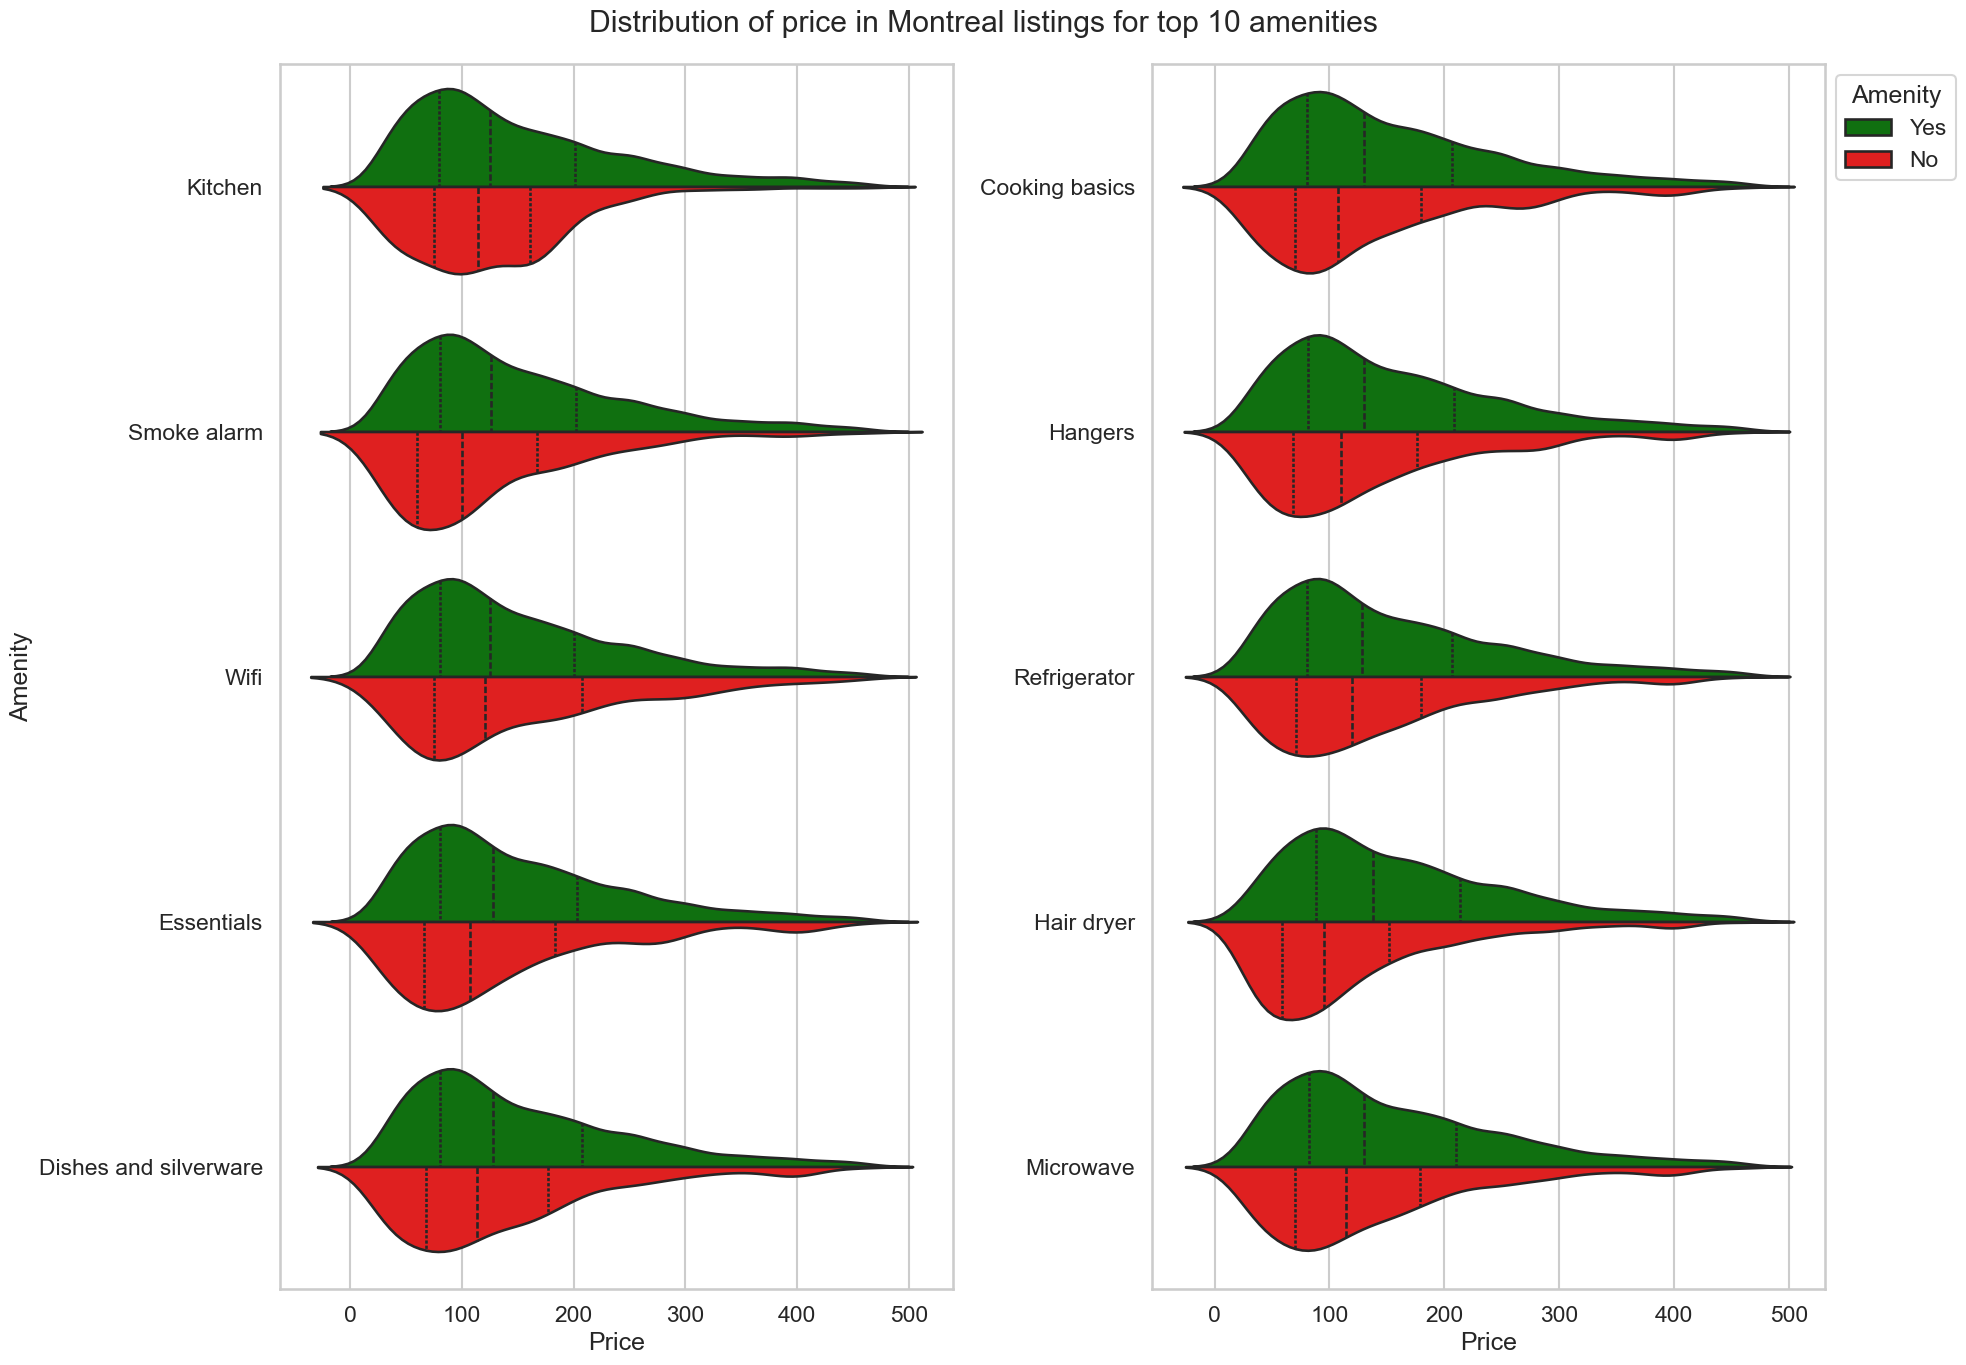

In [29]:
# Visualizing the average price of listings with and without amenities
plt.figure(figsize=(20, 14))
plt.subplot(1, 2, 1)
ax1 = sns.violinplot(
    (
        data_cleaned.loc[:, ["price"] + top_20_amenities[:5]]
        .melt(id_vars="price", var_name="amenity", value_name="amenity_present")
        .replace({1: "Yes", 0: "No"})
    ),
    y="amenity",
    x="price",
    hue="amenity_present",
    split=True,
    inner="quartile",
    palette={"Yes": "green", "No": "red"},
)
ax1.set_xlabel("Price")
ax1.set_ylabel("Amenity")
ax1.legend_.remove()

plt.subplot(1, 2, 2)
ax2 = sns.violinplot(
    (
        data_cleaned.loc[:, ["price"] + top_20_amenities[6:11]]
        .melt(id_vars="price", var_name="amenity", value_name="amenity_present")
        .replace({1: "Yes", 0: "No"})
    ),
    y="amenity",
    x="price",
    hue="amenity_present",
    split=True,
    inner="quartile",
    palette={"Yes": "green", "No": "red"},
)
ax2.set_xlabel("Price")
ax2.set_ylabel(None)
sns.move_legend(ax2, "upper left", bbox_to_anchor=(1, 1), ncol=1, title="Amenity")


plt.suptitle(
    f"Distribution of price in {city.capitalize()} listings for top 10 amenities"
)
plt.tight_layout()
plt.show()


From the above, we see that the presence of most amenities tend to increase the price of a listing. We can use this information to create a new feature called `num_amenities` which is the total number of amenities offered by a listing.

Further, we can create dummies for the top 20 amenities and use them as features in our model.


### Map of listings


In [30]:
map = folium.Map(
    location=[data_cleaned["latitude"].mean(), data_cleaned["longitude"].mean()],
    zoom_start=12,
    max_zoom=20,
    tiles=None,
)

folium.TileLayer("cartodbpositron", opacity=0.8, control=False).add_to(map)

# Create a color scale based on the price of listings in data_cleaned
vmin = data_cleaned["price"].quantile(0.05)
vmax = data_cleaned["price"].quantile(0.95)

colors = ["green", "lightgreen", "yellow", "orange", "red"]
price_scale = branca.colormap.LinearColormap(
    colors,
    vmin=vmin,
    vmax=vmax,
    caption="Price",
    index=[
        vmin,
        (vmin + vmax) / 4,
        (vmin + vmax) / 2,
        3 * (vmin + vmax) / 4,
        vmax,
    ],
)

price_scale = price_scale.to_step(15)

price_scale.add_to(map)


listings_group = plugins.MarkerCluster(name="Listings", control=False)
map.add_child(listings_group)


room_type = {}
for r_type in data_cleaned["room_type"].unique():
    room_type[r_type] = plugins.FeatureGroupSubGroup(listings_group, name=r_type)

for idx, row in data_cleaned.iterrows():
    popup_html = f"""
    <div style='font-family: Helvetica, Arial, sans-serif;'>
        <h4 style='margin-bottom: 10px; color: #333;'>{row["name"]}</h4>
        <div style='font-size: 14px; color: #888; margin-bottom: 10px;'>
            <p style='margin: 2px 0;'><b>Price:</b> ${row["price"]}</p>
            <p style='margin: 2px 0;'><b>Neighbourhood:</b> {row["neighbourhood_cleansed"]}</p>
            <p style='margin: 2px 0;'><b>Room type:</b> {row["room_type"]}</p>
            <p style='margin: 2px 0;'><b>Rating:</b> {row["review_scores_rating"]}</p>
            <p style='margin: 2px 0;'><b>Minimum nights:</b> {row["minimum_nights"]}</p>
        </div>
        <a href="{row['listing_url']}" target="_blank" style='color: #007BFF; text-decoration: none; display: inline-block; margin-bottom: 10px;'>View on Airbnb</a>
        <div style='width: 80%; height: 200px; overflow: hidden; border-radius: 10px; box-shadow: 0 2px 8px rgba(0, 0, 0, 0.1); display: flex; justify-content: center'>
            <img src="{row['picture_url']}" alt='Listing image' style='height: 100%; width: 100%; object-fit: cover; border-radius: 10px;'>
        </div>
    </div>
    """

    popup = folium.Popup(
        folium.IFrame(html=popup_html, width=400, height=400), max_width=400
    )

    marker = folium.CircleMarker(
        location=[row["latitude"], row["longitude"]],
        popup=popup,
        radius=5,
        fill=True,
        fill_opacity=1,
        color=price_scale(row["price"]),
    )

    marker.add_to(room_type[row["room_type"]])

for group in room_type.values():
    map.add_child(group)

map.add_child(
    plugins.MiniMap(tile_layer="cartodbpositron", toggle_display=True, minimized=True)
)
map.add_child(folium.LayerControl(collapsed=False))
map.add_child(plugins.Fullscreen())

map.save(f"maps/{city}.html")

## Data preprocessing and feature engineering

### Correlation between numerical features

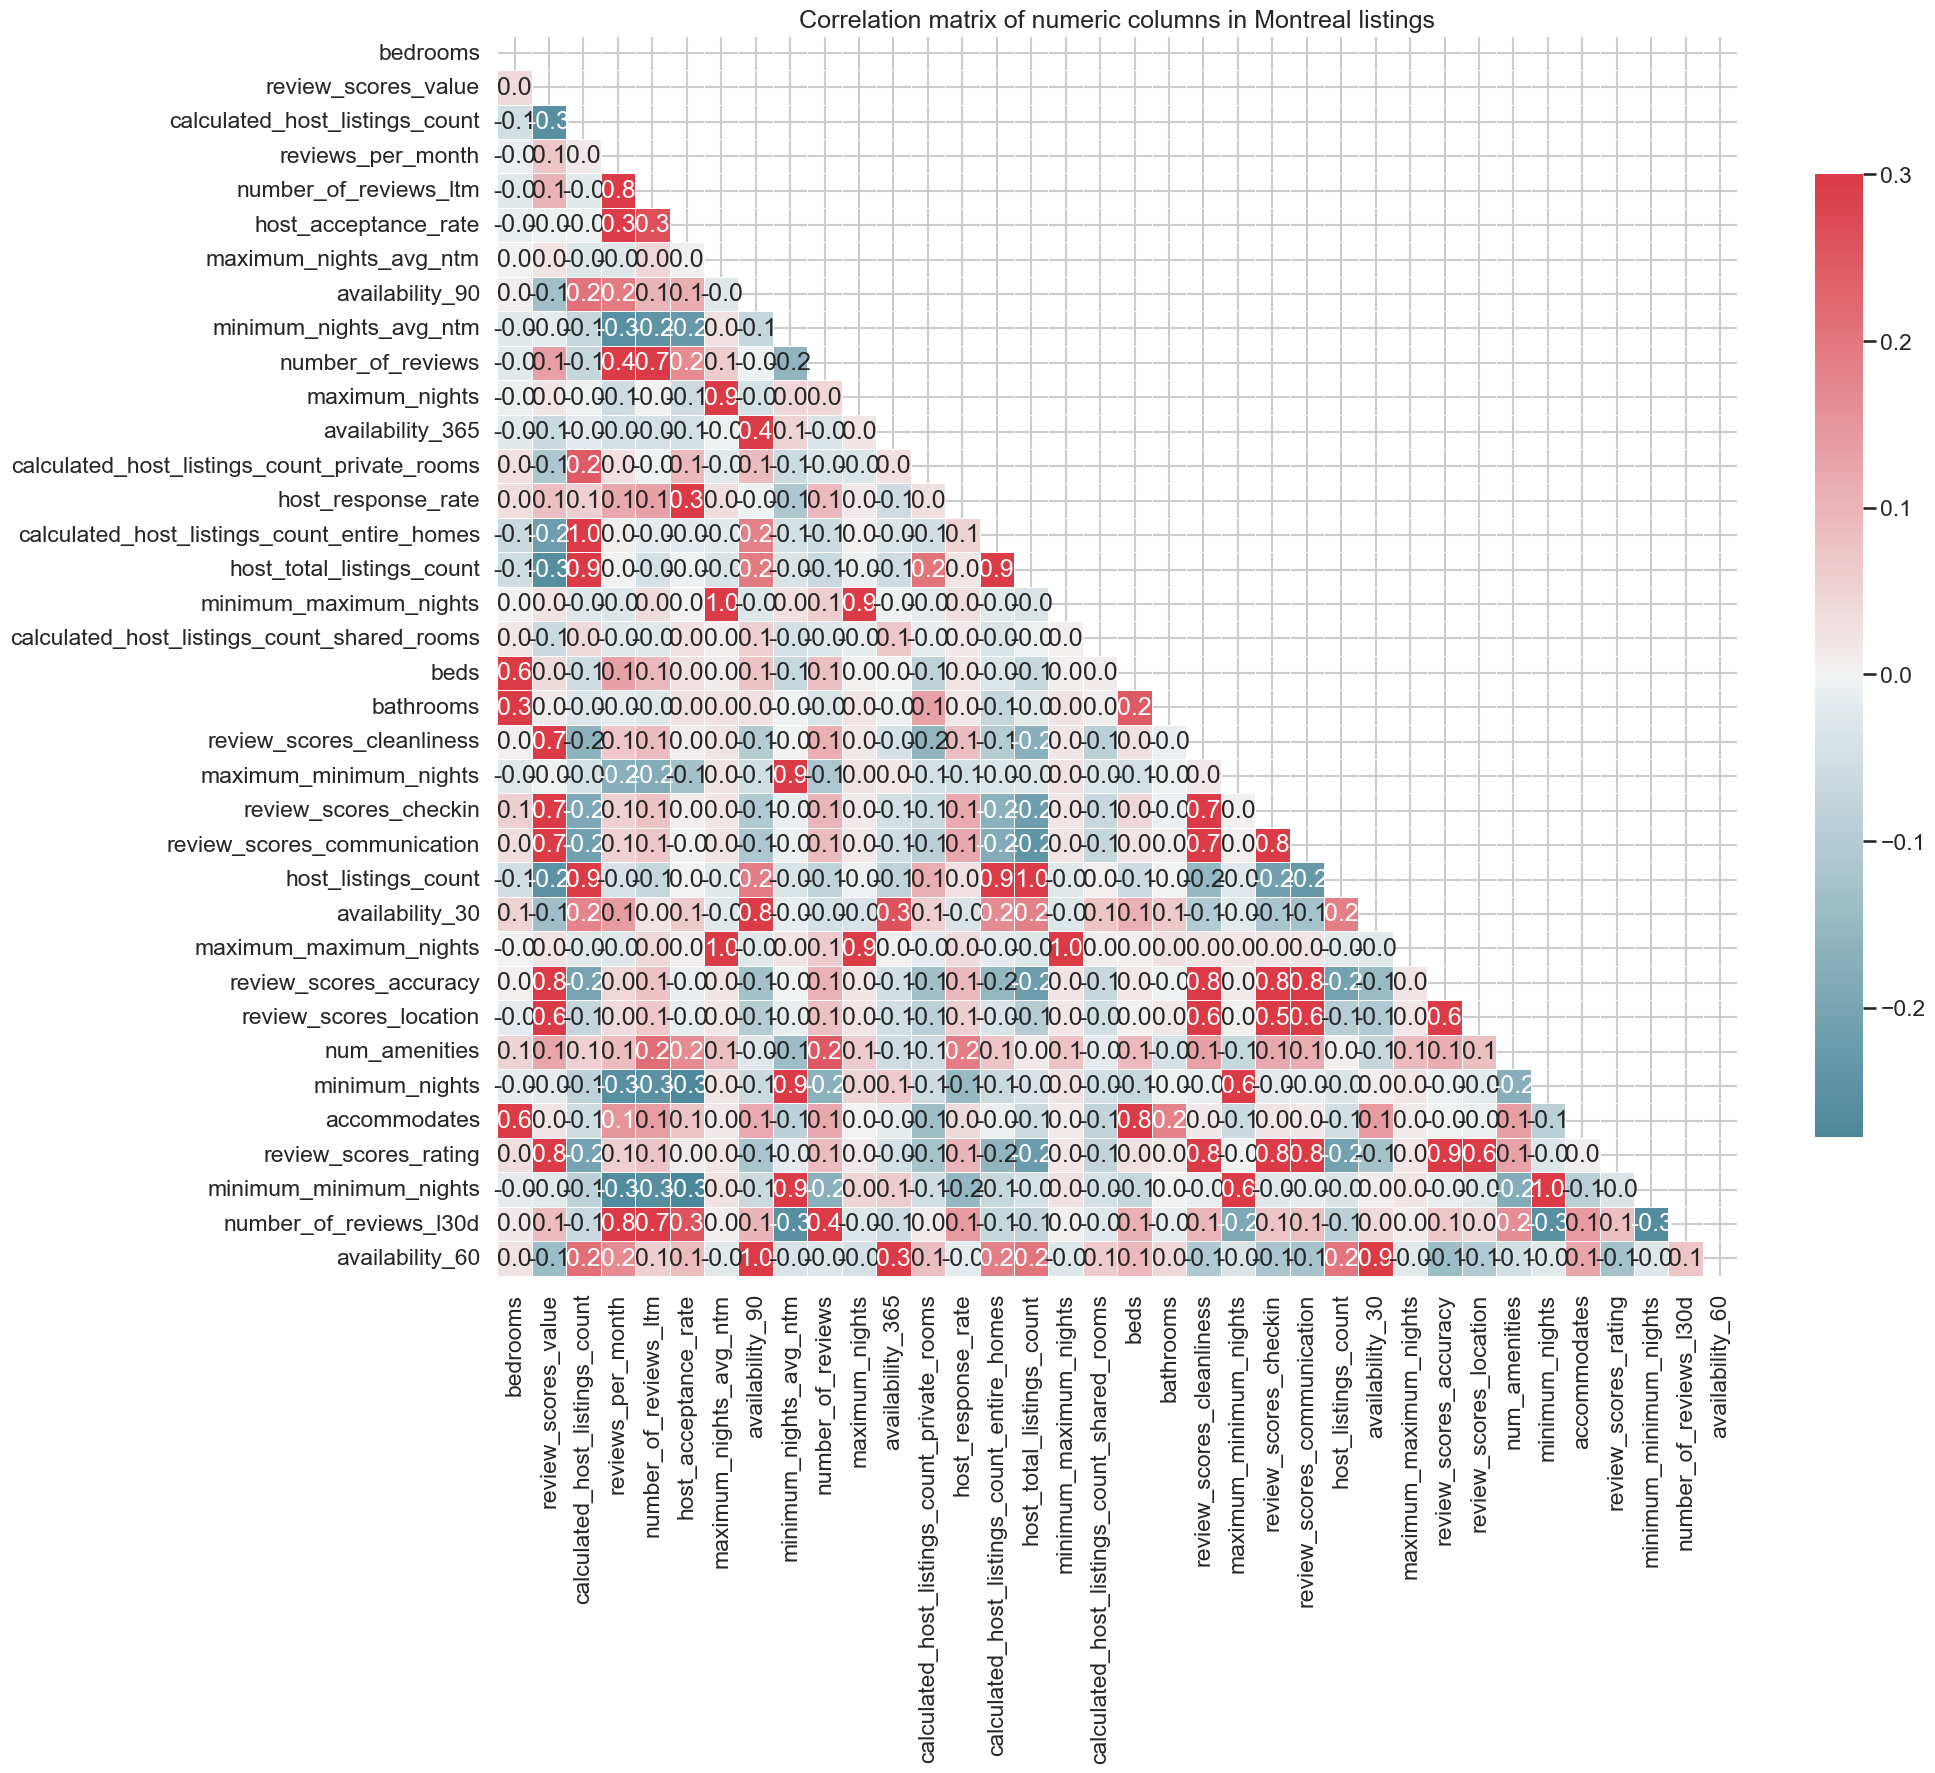

In [31]:
numeric_columns = [
    "accommodates",
    "bathrooms",
    "bedrooms",
    "beds",
    "minimum_nights",
    "maximum_nights",
    "availability_365",
    "number_of_reviews",
    "review_scores_rating",
    "host_response_rate",
    "host_listings_count",
    "host_acceptance_rate",
    "review_scores_accuracy",
    "review_scores_cleanliness",
    "review_scores_checkin",
    "review_scores_communication",
    "review_scores_location",
    "review_scores_value",
    "reviews_per_month",
    "host_acceptance_rate",
    "host_listings_count",
    "host_total_listings_count",
    "accommodates",
    "bathrooms",
    "minimum_nights",
    "maximum_nights",
    "minimum_minimum_nights",
    "maximum_minimum_nights",
    "minimum_maximum_nights",
    "maximum_maximum_nights",
    "minimum_nights_avg_ntm",
    "maximum_nights_avg_ntm",
    "availability_30",
    "availability_60",
    "availability_90",
    "availability_365",
    "number_of_reviews",
    "number_of_reviews_ltm",
    "number_of_reviews_l30d",
    "calculated_host_listings_count",
    "calculated_host_listings_count_entire_homes",
    "calculated_host_listings_count_private_rooms",
    "calculated_host_listings_count_shared_rooms",
    "reviews_per_month",
    "num_amenities",
]

# Merging the two lists to have all numeric columns uniquely
numeric_columns = list(set(numeric_columns))

plt.figure(figsize=(20, 25))
corr = data_cleaned[numeric_columns].corr()
sns.heatmap(
    corr,
    mask=np.triu(np.ones_like(corr, dtype=bool)),
    cmap=sns.diverging_palette(220, 10, as_cmap=True, center="light"),
    vmax=0.3,
    center=0,
    square=True,
    annot=True,
    fmt=".1f",
    linewidths=0.5,
    cbar_kws={"shrink": 0.5},
)

plt.title(f"Correlation matrix of numeric columns in {city.capitalize()} listings")
plt.show()

#### Calculating variance inflation factor (VIF)

To check for multicollinearity, we can calculate the VIF for each feature. VIF measures how much the variance of an estimated regression coefficient increases if your predictors are correlated.

To calculate the VIF, we first handle the NaN values using KNN imputation. Then, we scale the data using StandardScaler and calculate the VIF for each feature.

In [32]:
data_cleaned[numeric_columns].isnull().sum().sort_values(ascending=False)

review_scores_location                          1383
review_scores_accuracy                          1383
review_scores_communication                     1383
review_scores_checkin                           1383
review_scores_cleanliness                       1383
review_scores_value                             1383
review_scores_rating                            1374
reviews_per_month                               1374
host_response_rate                               886
host_acceptance_rate                             580
beds                                              79
bathrooms                                         13
bedrooms                                           2
calculated_host_listings_count_private_rooms       0
availability_30                                    0
number_of_reviews_l30d                             0
minimum_minimum_nights                             0
calculated_host_listings_count                     0
accommodates                                  

In [33]:
# Impute missing values using KNNImputer
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)
data_cleaned[numeric_columns] = imputer.fit_transform(data_cleaned[numeric_columns])

data_cleaned[numeric_columns].isnull().sum().sort_values(ascending=False)

bedrooms                                        0
review_scores_value                             0
review_scores_cleanliness                       0
maximum_minimum_nights                          0
review_scores_checkin                           0
review_scores_communication                     0
host_listings_count                             0
availability_30                                 0
maximum_maximum_nights                          0
review_scores_accuracy                          0
review_scores_location                          0
num_amenities                                   0
minimum_nights                                  0
accommodates                                    0
review_scores_rating                            0
minimum_minimum_nights                          0
number_of_reviews_l30d                          0
bathrooms                                       0
beds                                            0
calculated_host_listings_count_shared_rooms     0


In [34]:
# Calculate the VIFs for the new imputed dataset, after scaling the data
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

scaler = StandardScaler()

scaled_data = pd.DataFrame(
    scaler.fit_transform(data_cleaned[numeric_columns]), columns=numeric_columns
)

vif_data = pd.DataFrame()
vif_data["feature"] = numeric_columns
vif_data["VIF"] = [
    variance_inflation_factor(scaled_data[numeric_columns].values, i)
    for i in range(len(numeric_columns))
]

vif_data = vif_data.sort_values(by="VIF", ascending=False)

# View variables with VIF > 5
vif_data[vif_data["VIF"] > 5]

,feature,VIF
2,calculated_host_listings_count,1342.2405
14,calculated_host_listings_count_entire_homes,1264.6841
6,maximum_nights_avg_ntm,529.6330
16,minimum_maximum_nights,254.5116
26,maximum_maximum_nights,200.8375
12,calculated_host_listings_count_private_rooms,122.0602
8,minimum_nights_avg_ntm,56.9347
33,minimum_minimum_nights,32.6238
30,minimum_nights,28.8326
35,availability_60,23.7953


#### Removing features with high VIF

Based on the above, we can remove the features with high VIF (> 5). Therefore, columns such as `review_score_*`, `host_response_rate`, `calculated_host_listings_count`, and such.

In [35]:
# Removing columns with high VIF
numeric_columns_to_remove = set(
    (
        "host_response_rate",
        "review_scores_rating",
        "review_scores_communication",
        "review_scores_cleanliness",
        "review_scores_accuracy",
        "review_scores_location",
        "review_scores_value",
        "review_scores_checkin",
        "maximum_minimum_nights",
        "maximum_maximum_nights",
        "maximum_nights_avg_ntm",
        "number_of_reviews_ltm",
        "availability_30",
        "availability_60",
        "availability_90",
        "calculated_host_listings_count_entire_homes",
        "calculated_host_listings_count_private_rooms",
        "calculated_host_listings_count_shared_rooms",
        "calculated_host_listings_count",
        "minimum_minimum_nights",
        "minimum_maximum_nights",
        "minimum_nights_avg_ntm",
        "host_total_listings_count",
        "reviews_per_month",
        "number_of_reviews",
        "number_of_reviews_l30d",
    )
)

numeric_columns = list(set(numeric_columns) - numeric_columns_to_remove)

# Calculating VIF again

vif_data = pd.DataFrame()
vif_data["feature"] = numeric_columns
vif_data["VIF"] = [
    variance_inflation_factor(scaled_data[numeric_columns].values, i)
    for i in range(len(numeric_columns))
]

vif_data = vif_data.sort_values(by="VIF", ascending=False)

vif_data

,feature,VIF
4,accommodates,2.7441
5,beds,2.6508
6,bedrooms,1.7110
9,host_acceptance_rate,1.1354
2,minimum_nights,1.1320
7,bathrooms,1.1285
1,num_amenities,1.0832
3,availability_365,1.0144
0,maximum_nights,1.0135
8,host_listings_count,1.0126


In [36]:
# Removing columns from `data_cleaned`

data_cleaned = data_cleaned.drop(columns=numeric_columns_to_remove, errors="ignore")

data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7523 entries, 0 to 7932
Data columns (total 72 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   id                            7523 non-null   int64         
 1   listing_url                   7523 non-null   object        
 2   scrape_id                     7523 non-null   int64         
 3   last_scraped                  7523 non-null   object        
 4   source                        7523 non-null   object        
 5   name                          7523 non-null   object        
 6   description                   7478 non-null   object        
 7   neighborhood_overview         4060 non-null   object        
 8   picture_url                   7523 non-null   object        
 9   host_id                       7523 non-null   int64         
 10  host_url                      7523 non-null   object        
 11  host_name                     

#### Removing `property_type` column as it is redundant

In [37]:
data_cleaned = data_cleaned.drop(columns=["property_type"], errors="ignore")
data_cleaned.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_365,calendar_last_scraped,first_review,last_review,license,instant_bookable,bathrooms_is_shared,num_amenities,Bed linens,Cooking basics,Dedicated workspace,Dishes and silverware,Essentials,Hair dryer,Hangers,Heating,Hot water,Iron,Kitchen,Long term stays allowed,Microwave,Oven,Refrigerator,Self check-in,Shampoo,Smoke alarm,Washer,Wifi,log_price
0,534948,https://www.airbnb.com/rooms/534948,20230902231108,2023-09-03,city scrape,Rental unit in Montreal · ★4.83 · 2 bedrooms ·...,<b>The space</b><br />The apartment is fully e...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,1610679,https://www.airbnb.com/users/show/1610679,Edward,2012-01-15,"Bissau, Guinea-Bissau","Hey, I'm from Montreal , Canada .. fascinati...",within a few hours,56.0000,True,https://a0.muscache.com/im/users/1610679/profi...,https://a0.muscache.com/im/users/1610679/profi...,Little Burgundy,3.0000,"['email', 'phone', 'work_email']",True,True,NaN,Le Sud-Ouest,NaN,45.4873,-73.5733,Entire home/apt,4.0000,1.0000,1 bath,2.0000,2.0000,"Bed linens, Outdoor dining area, Resort view, ...",88.0000,31.0000,62.0000,NaN,True,56.0000,2023-09-03,2013-01-16,2023-09-01,NaN,False,False,18.0000,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,0,4.4773
1,542160,https://www.airbnb.com/rooms/542160,20230902231108,2023-09-03,city scrape,Condo in Montreal · ★4.77 · 1 bedroom · 1 bed ...,<b>The space</b><br />I am renting my lovely c...,"Le plateau Mont-Royal is in my opinion, the be...",https://a0.muscache.com/pictures/29641965/040b...,2666170,https://www.airbnb.com/users/show/2666170,Alex,2012-06-17,"Montreal, Canada",Hello!\r\n\r\nI am a film/travel tv series dir...,within a day,57.0000,False,https://a0.muscache.com/im/pictures/user/e4efc...,https://a0.muscache.com/im/pictures/user/e4efc...,Le Plateau,3.0000,"['email', 'phone', 'work_email']",True,True,"Montreal, Quebec, Canada",Le Plateau-Mont-Royal,NaN,45.5367,-73.5814,Entire home/apt,2.0000,1.0000,1 bath,1.0000,1.0000,"Shampoo, Wifi, Oven, Patio or balcony, Microwa...",91.0000,31.0000,1125.0000,NaN,True,274.0000,2023-09-03,2014-05-20,2023-08-19,"284723, expires: 2024-06-30",False,False,17.0000,0,1,1,1,1,1,1,1,1,1,1,0,1,1,1,0,1,1,1,1,4.5109
2,556742,https://www.airbnb.com/rooms/556742,20230902231108,2023-09-03,city scrape,Rental unit in Montreal · ★4.83 · 2 bedrooms ·...,The building is occupied by families mostly. T...,"This neighborhood is our favorite, the Avenue ...",https://a0.muscache.com/pictures/9263006/946af...,2737452,https://www.airbnb.com/users/show/2737452,Carole,2012-06-25,"Montreal, Canada","Nous sommes une famille, nous avons fait l'acq...",within a few hours,100.0000,True,https://a0.muscache.com/im/users/2737452/profi...,https://a0.muscache.com/im/users/2737452/profi...,Le Plateau,2.0000,"['email', 'phone', 'work_email']",True,True,"Montreal, Quebec, Canada",Le Plateau-Mont-Royal,NaN,45.5309,-73.5685,Entire home/apt,4.0000,1.0000,1 bath,2.0000,2.0000,"Bed linens, Self check-in, Private entrance, S...",101.0000,31.0000,1125.0000,NaN,True,284.0000,2023-09-03,2012-08-16,2023-08-23,NaN,False,False,18.0000,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,4.6151
3,564098,https://www.airbnb.com/rooms/564098,20230902231108,2023-09-03,city scrape,Rental unit in Montreal · ★4.80 · 1 bedroom · ...,A bright and sunny upper triplex on a tree-lin...,"Location: On the edge of the Plateau, close to...",https://a0.muscache.com/pictures/7314398/a9b57...,2542265,

### Dropping text columns

In [38]:
# Removing useless text columns
text_cols_to_drop = [
    "id",
    "listing_url",
    "scrape_id",
    "last_scraped",
    "source",
    "name",
    "description",
    "neighborhood_overview",
    "picture_url",
    "host_id",
    "host_url",
    "host_name",
    "host_since",
    "host_location",
    "host_about",
    "host_thumbnail_url",
    "host_picture_url",
    "host_neighbourhood",
    "calendar_last_scraped",
    "first_review",
    "last_review",
    "license",
    "calendar_updated",
    "neighbourhood_group_cleansed",
    "amenities",
    "host_has_profile_pic",
    "host_identity_verified",
    "latitude",
    "longitude",
]

data_cleaned = data_cleaned.drop(columns=text_cols_to_drop, errors="ignore")
data_cleaned.head()

,host_response_time,host_acceptance_rate,host_is_superhost,host_listings_count,host_verifications,neighbourhood,neighbourhood_cleansed,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,price,minimum_nights,maximum_nights,has_availability,availability_365,instant_bookable,bathrooms_is_shared,num_amenities,Bed linens,Cooking basics,Dedicated workspace,Dishes and silverware,Essentials,Hair dryer,Hangers,Heating,Hot water,Iron,Kitchen,Long term stays allowed,Microwave,Oven,Refrigerator,Self check-in,Shampoo,Smoke alarm,Washer,Wifi,log_price
0,within a few hours,56.0000,True,3.0000,"['email', 'phone', 'work_email']",NaN,Le Sud-Ouest,Entire home/apt,4.0000,1.0000,1 bath,2.0000,2.0000,88.0000,31.0000,62.0000,True,56.0000,False,False,18.0000,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,0,4.4773
1,within a day,57.0000,False,3.0000,"['email', 'phone', 'work_email']","Montreal, Quebec, Canada",Le Plateau-Mont-Royal,Entire home/apt,2.0000,1.0000,1 bath,1.0000,1.0000,91.0000,31.0000,1125.0000,True,274.0000,False,False,17.0000,0,1,1,1,1,1,1,1,1,1,1,0,1,1,1,0,1,1,1,1,4.5109
2,within a few hours,100.0000,True,2.0000,"['email', 'phone', 'work_email']","Montreal, Quebec, Canada",Le Plateau-Mont-Royal,Entire home/apt,4.0000,1.0000,1 bath,2.0000,2.0000,101.0000,31.0000,1125.0000,True,284.0000,False,False,18.0000,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,4.6151
3,within a day,78.0000,False,2.0000,"['email', 'phone']","Montreal, Quebec, Canada",Le Plateau-Mont-Royal,Entire home/apt,2.0000,1.0000,1 bath,1.0000,1.0000,50.0000,31.0000,1125.0000,True,140.0000,False,False,16.0000,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,0,0,1,0,1,3.9120
4,within an hour,98.0000,False,1.0000,"['email', 'phone', 'work_email']",NaN,Ville-Marie,Entire home/apt,4.0000,1.0000,1 bath,1.0000,2.0000,190.0000,31.0000,60.0000,True,308.0000,False,False,16.0000,1,1,0,1,1,1,1,0,1,1,1,1,1,1,0,1,1,1,0,1,5.2470


### Checking for null values in categorical columns

In [39]:
categorical_columns = data_cleaned.select_dtypes(include="object").columns
data_cleaned[categorical_columns].isnull().sum(), data_cleaned.shape

(host_response_time         886
 host_verifications           0
 neighbourhood             3463
 neighbourhood_cleansed       0
 room_type                    0
 bathrooms_text               9
 dtype: int64,
 (7523, 42))

In [40]:
data_cleaned["host_response_time"].value_counts()

within an hour        5066
within a few hours     957
within a day           493
a few days or more     121
Name: host_response_time, dtype: int64

In [41]:
# Drop `neighbourhood` column
data_cleaned = data_cleaned.drop(columns=["neighbourhood"], errors="ignore")

# Impute missing values in `host_response_time` column
weights = data_cleaned["host_response_time"].value_counts(normalize=True).values
host_response_time_options = [
    "within an hour",
    "within a few hours",
    "within a day",
    "a few days or more",
]
data_cleaned["host_response_time"] = data_cleaned["host_response_time"].fillna(
    pd.Series(
        np.random.choice(host_response_time_options, p=weights, size=len(data_cleaned))
    )
)

data_cleaned["host_response_time"].fillna(
    data_cleaned["host_response_time"].mode()[0], inplace=True
)

# Drop NaNs in `bathrooms_text` and `bathrooms_is_shared` columns
data_cleaned = data_cleaned.dropna(
    subset=["bathrooms_text", "bathrooms_is_shared"], axis=0, how="any"
)

### Cleaning `host_verification` column

In [42]:
host_verification_dummies = (
    data_cleaned["host_verifications"]
    .str.replace(r"\[|\]|\'", "")
    .str.get_dummies(sep=", ")
    .rename(lambda x: "host_verification_" + x, axis=1)
    .astype("uint8")
)

data_cleaned = (pd.concat([data_cleaned, host_verification_dummies], axis=1)).drop(
    columns=["host_verifications"], errors="ignore"
)

### Creating dummy variables for categorical columns

In [43]:
print(f"Shape before dummy encoding: {data_cleaned.shape}")

# Dummy encode categorical columns
data_cleaned = pd.get_dummies(
    data_cleaned, columns=data_cleaned.select_dtypes("object").columns
)

print(f"Shape after dummy encoding: {data_cleaned.shape}")

data_cleaned.head()

Shape before dummy encoding: (7514, 43)
Shape after dummy encoding: (7514, 103)


,host_acceptance_rate,host_is_superhost,host_listings_count,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,maximum_nights,has_availability,availability_365,instant_bookable,bathrooms_is_shared,num_amenities,Bed linens,Cooking basics,Dedicated workspace,Dishes and silverware,Essentials,Hair dryer,Hangers,Heating,Hot water,Iron,Kitchen,Long term stays allowed,Microwave,Oven,Refrigerator,Self check-in,Shampoo,Smoke alarm,Washer,Wifi,log_price,host_verification_email,host_verification_phone,host_verification_work_email,host_response_time_a few days or more,host_response_time_within a day,host_response_time_within a few hours,host_response_time_within an hour,neighbourhood_cleansed_Ahuntsic-Cartierville,neighbourhood_cleansed_Anjou,neighbourhood_cleansed_Baie-d'Urfé,neighbourhood_cleansed_Beaconsfield,neighbourhood_cleansed_Côte-Saint-Luc,neighbourhood_cleansed_Côte-des-Neiges-Notre-Dame-de-Grâce,neighbourhood_cleansed_Dollard-des-Ormeaux,neighbourhood_cleansed_Dorval,neighbourhood_cleansed_Hampstead,neighbourhood_cleansed_Kirkland,neighbourhood_cleansed_L'Île-Bizard-Sainte-Geneviève,neighbourhood_cleansed_L'Île-Dorval,neighbourhood_cleansed_LaSalle,neighbourhood_cleansed_Lachine,neighbourhood_cleansed_Le Plateau-Mont-Royal,neighbourhood_cleansed_Le Sud-Ouest,neighbourhood_cleansed_Mercier-Hochelaga-Maisonneuve,neighbourhood_cleansed_Mont-Royal,neighbourhood_cleansed_Montréal-Est,neighbourhood_cleansed_Montréal-Nord,neighbourhood_cleansed_Montréal-Ouest,neighbourhood_cleansed_Outremont,neighbourhood_cleansed_Pierrefonds-Roxboro,neighbourhood_cleansed_Pointe-Claire,neighbourhood_cleansed_Rivière-des-Prairies-Pointe-aux-Trembles,neighbourhood_cleansed_Rosemont-La Petite-Patrie,neighbourhood_cleansed_Saint-Laurent,neighbourhood_cleansed_Saint-Léonard,neighbourhood_cleansed_Sainte-Anne-de-Bellevue,neighbourhood_cleansed_Senneville,neighbourhood_cleansed_Verdun,neighbourhood_cleansed_Ville-Marie,neighbourhood_cleansed_Villeray-Saint-Michel-Parc-Extension,neighbourhood_cleansed_Westmount,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room,bathrooms_text_0 baths,bathrooms_text_1 bath,bathrooms_text_1 private bath,bathrooms_text_1 shared bath,bathrooms_text_1.5 baths,bathrooms_text_1.5 shared baths,bathrooms_text_2 baths,bathrooms_text_2 shared baths,bathrooms_text_2.5 baths,bathrooms_text_2.5 shared baths,bathrooms_text_3 baths,bathrooms_text_3 shared baths,bathrooms_text_3.5 baths,bathrooms_text_4 baths,bathrooms_text_4 shared baths,bathrooms_text_5 baths,bathrooms_text_5 shared baths,bathrooms_text_6 baths,bathrooms_text_8 baths,bathrooms_text_8 shared baths,bathrooms_text_Half-bath,bathrooms_text_Shared half-bath
0,56.0000,True,3.0000,4.0000,1.0000,2.0000,2.0000,88.0000,31.0000,62.0000,True,56.0000,False,False,18.0000,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,0,4.4773,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,57.0000,False,3.0000,2.0000,1.0000,1.0000,1.0000,91.0000,31.0000,1125.0000,True,274.0000,False,False,17.0000,0,1,1,1,1,1,1,1,1,1,1,0,1,1,1,0,1,1,1,1,4.5109,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,100.0000,True,2.0000,4.0000,1.0000,2.0000,2.0000,101.0000,31.0000,1125.0000,True,284.0000,False,False,18.0000,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,4.6151,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,78.0000,False,2.0000,2.0000,1.0000,1.0000,1.0000,50.0000,31.0000,1125.0000,True,140.0000,False,False,16.0000,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,0,0,1,0,1,3.9120,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,98.0000,False,1.0000,4.0000,1.0000,1.0000,2.0000,190.0000,31.0000,60.0000,True,308.0000,False,False,16.0000,1,1,0,1,1,1,1,0,1,1,1,

### Create a training and test set

In [44]:
X = data_cleaned.drop(columns=["price", "log_price"], errors="ignore")
y = data_cleaned["log_price"]

print(f"{X.shape=}, {y.shape=}")

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.75, random_state=6954
)

print(f"{X_train.shape=}, {X_test.shape=}, {y_train.shape=}, {y_test.shape=}")

X_train.head()

X.shape=(7514, 101), y.shape=(7514,)
X_train.shape=(5635, 101), X_test.shape=(1879, 101), y_train.shape=(5635,), y_test.shape=(1879,)


,host_acceptance_rate,host_is_superhost,host_listings_count,accommodates,bathrooms,bedrooms,beds,minimum_nights,maximum_nights,has_availability,availability_365,instant_bookable,bathrooms_is_shared,num_amenities,Bed linens,Cooking basics,Dedicated workspace,Dishes and silverware,Essentials,Hair dryer,Hangers,Heating,Hot water,Iron,Kitchen,Long term stays allowed,Microwave,Oven,Refrigerator,Self check-in,Shampoo,Smoke alarm,Washer,Wifi,host_verification_email,host_verification_phone,host_verification_work_email,host_response_time_a few days or more,host_response_time_within a day,host_response_time_within a few hours,host_response_time_within an hour,neighbourhood_cleansed_Ahuntsic-Cartierville,neighbourhood_cleansed_Anjou,neighbourhood_cleansed_Baie-d'Urfé,neighbourhood_cleansed_Beaconsfield,neighbourhood_cleansed_Côte-Saint-Luc,neighbourhood_cleansed_Côte-des-Neiges-Notre-Dame-de-Grâce,neighbourhood_cleansed_Dollard-des-Ormeaux,neighbourhood_cleansed_Dorval,neighbourhood_cleansed_Hampstead,neighbourhood_cleansed_Kirkland,neighbourhood_cleansed_L'Île-Bizard-Sainte-Geneviève,neighbourhood_cleansed_L'Île-Dorval,neighbourhood_cleansed_LaSalle,neighbourhood_cleansed_Lachine,neighbourhood_cleansed_Le Plateau-Mont-Royal,neighbourhood_cleansed_Le Sud-Ouest,neighbourhood_cleansed_Mercier-Hochelaga-Maisonneuve,neighbourhood_cleansed_Mont-Royal,neighbourhood_cleansed_Montréal-Est,neighbourhood_cleansed_Montréal-Nord,neighbourhood_cleansed_Montréal-Ouest,neighbourhood_cleansed_Outremont,neighbourhood_cleansed_Pierrefonds-Roxboro,neighbourhood_cleansed_Pointe-Claire,neighbourhood_cleansed_Rivière-des-Prairies-Pointe-aux-Trembles,neighbourhood_cleansed_Rosemont-La Petite-Patrie,neighbourhood_cleansed_Saint-Laurent,neighbourhood_cleansed_Saint-Léonard,neighbourhood_cleansed_Sainte-Anne-de-Bellevue,neighbourhood_cleansed_Senneville,neighbourhood_cleansed_Verdun,neighbourhood_cleansed_Ville-Marie,neighbourhood_cleansed_Villeray-Saint-Michel-Parc-Extension,neighbourhood_cleansed_Westmount,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room,bathrooms_text_0 baths,bathrooms_text_1 bath,bathrooms_text_1 private bath,bathrooms_text_1 shared bath,bathrooms_text_1.5 baths,bathrooms_text_1.5 shared baths,bathrooms_text_2 baths,bathrooms_text_2 shared baths,bathrooms_text_2.5 baths,bathrooms_text_2.5 shared baths,bathrooms_text_3 baths,bathrooms_text_3 shared baths,bathrooms_text_3.5 baths,bathrooms_text_4 baths,bathrooms_text_4 shared baths,bathrooms_text_5 baths,bathrooms_text_5 shared baths,bathrooms_text_6 baths,bathrooms_text_8 baths,bathrooms_text_8 shared baths,bathrooms_text_Half-bath,bathrooms_text_Shared half-bath
2194,100.0000,True,1.0000,8.0000,2.0000,4.0000,5.0000,31.0000,1125.0000,True,271.0000,True,False,15.0000,1,1,0,1,1,1,1,1,0,1,1,0,1,1,1,0,1,1,0,1,1,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3501,100.0000,False,1.0000,2.0000,1.0000,1.0000,1.0000,1.0000,1125.0000,True,262.0000,True,False,15.0000,1,1,1,1,1,1,1,0,1,0,1,1,1,0,1,1,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5580,100.0000,False,8.0000,4.0000,1.0000,1.0000,2.0000,31.0000,365.0000,True,153.0000,True,False,19.0000,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6588,64.0000,False,88.0000,2.0000,1.0000,1.0000,1.0000,31.0000,365.0000,True,337.0000,False,False,9.0000,0,0,0,1,0,0,0,1,1,0,1,0,1,1,1,0,0,0,1,1,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5538,99.0000,False,29.0000,1.0000,1.0000,2.0000,1.0000,1.0000,365.0000,True,313.0000,True,True,13.0000,0,1,1,0,1,1,0,1,1,1,1,1,0,0,0,1,1,1,0,1,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,

### Use a random forest regressor to select features

In [45]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel

from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

numeric_columns_to_scale = [
    "host_acceptance_rate",
    "host_listings_count",
    "accommodates",
    "bathrooms",
    "bedrooms",
    "beds",
    "minimum_nights",
    "maximum_nights",
    "availability_365",
    "num_amenities",
]

scaler = MinMaxScaler()

X_train_scaled = X_train.copy()
X_train_scaled[numeric_columns_to_scale] = scaler.fit_transform(
    X_train[numeric_columns_to_scale]
)

rf = RandomForestRegressor(random_state=6954, n_estimators=300, min_samples_split=30)
sfm = SelectFromModel(rf, threshold=0.001)

sfm.fit(X_train_scaled, y_train)

# Get the names of the features that are not selected (support is False)
features_to_drop = X_train_scaled.columns[~sfm.get_support()]

# Only remove those features that are not part of a dummy variable

dummy_vars = [
    "host_is_superhost",
    "host_verification",
    "host_response_time",
    "neighbourhood_cleansed",
    "room_type",
    "bathrooms",
]

features_to_drop = [
    feature
    for feature in features_to_drop
    if not any(feature.startswith(s) for s in dummy_vars)
]

features_to_drop

['has_availability']

### Create final training and test sets

In [46]:
X_train = X_train.drop(columns=features_to_drop, errors="ignore")
X_test = X_test.drop(columns=features_to_drop, errors="ignore")

print(f"{X_train.shape=}, {X_test.shape=}")

X_train.shape=(5635, 100), X_test.shape=(1879, 100)


## Model building

### Creating a pipeline

In [47]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score


def get_model_performance(name, model, params, X_train, y_train, X_test, y_test, k=5):
    print("-" * 100)
    print(f"Training {name} model...")
    # Create a pipeline with a scaler and the model
    pipeline = Pipeline([("scaler", MinMaxScaler()), ("model", model)])

    # Grid search with cross-validation
    grid = GridSearchCV(
        pipeline, params, cv=k, n_jobs=-1, verbose=3, scoring="neg_mean_squared_error"
    )
    grid.fit(X_train, y_train)

    # Best model and its parameters
    print("Best parameters found: ", grid.best_params_)
    best_model = grid.best_estimator_

    # Performance on the test set
    y_pred = best_model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"Test MSE: {mse}, Test R^2: {r2}")

    return {"model": best_model, "scores": (mse, r2)}

### Training models

#### Linear regression (Base, Lasso, Ridge, ElasticNet)

In [48]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet

lin_reg = get_model_performance(
    "Linear Regression",
    LinearRegression(),
    {},
    X_train,
    y_train,
    X_test,
    y_test,
)

ridge = get_model_performance(
    "Ridge Regression",
    Ridge(),
    {"model__alpha": np.logspace(-4, 2, 10)},
    X_train,
    y_train,
    X_test,
    y_test,
)

lasso = get_model_performance(
    "Lasso Regression",
    Lasso(),
    {"model__alpha": np.logspace(-4, 2, 10)},
    X_train,
    y_train,
    X_test,
    y_test,
)

elastic_net = get_model_performance(
    "Elastic Net Regression",
    ElasticNet(),
    {"model__alpha": np.logspace(-4, 2, 10), "model__l1_ratio": np.linspace(0, 1, 5)},
    X_train,
    y_train,
    X_test,
    y_test,
)

----------------------------------------------------------------------------------------------------
Training Linear Regression model...
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best parameters found:  {}
Test MSE: 4.282603714323725e+19, Test R^2: -1.0214251325142078e+20
----------------------------------------------------------------------------------------------------
Training Ridge Regression model...
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters found:  {'model__alpha': 4.641588833612772}
Test MSE: 0.2320738088242341, Test R^2: 0.44649088091307865
----------------------------------------------------------------------------------------------------
Training Lasso Regression model...
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters found:  {'model__alpha': 0.0001}
Test MSE: 0.23650624376659377, Test R^2: 0.4359192736611214
---------------------------------------------------------------------------------------

#### Decision Tree

In [49]:
from sklearn.tree import DecisionTreeRegressor

dt = get_model_performance(
    "Decision Tree Regressor",
    DecisionTreeRegressor(random_state=6954),
    {
        "model__max_depth": [None, 5, 10, 15, 20, 25],
        "model__min_samples_split": [2, 5, 10, 15, 20],
    },
    X_train,
    y_train,
    X_test,
    y_test,
)

----------------------------------------------------------------------------------------------------
Training Decision Tree Regressor model...
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best parameters found:  {'model__max_depth': 10, 'model__min_samples_split': 20}
Test MSE: 0.1888420009180978, Test R^2: 0.5496011803126277


#### Random Forest

In [50]:
from sklearn.ensemble import RandomForestRegressor

rf = get_model_performance(
    "Random Forest Regressor",
    RandomForestRegressor(random_state=6954),
    {
        "model__n_estimators": [100, 200, 300],
        "model__min_samples_split": [2, 5, 10],
    },
    X_train,
    y_train,
    X_test,
    y_test,
)

----------------------------------------------------------------------------------------------------
Training Random Forest Regressor model...
Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best parameters found:  {'model__min_samples_split': 2, 'model__n_estimators': 200}
Test MSE: 0.13471084842180298, Test R^2: 0.6787070310985575


#### K-Nearest Neighbors

In [51]:
from sklearn.neighbors import KNeighborsRegressor

knn = get_model_performance(
    "KNN Regressor",
    KNeighborsRegressor(),
    {"model__n_neighbors": [5, 10, 15, 20, 25]},
    X_train,
    y_train,
    X_test,
    y_test,
)

----------------------------------------------------------------------------------------------------
Training KNN Regressor model...
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best parameters found:  {'model__n_neighbors': 10}
Test MSE: 0.2213279523030586, Test R^2: 0.47212035460080126


#### XGBoost

In [52]:
from xgboost import XGBRegressor

xgb = get_model_performance(
    "XGBoost Regressor",
    XGBRegressor(random_state=6954),
    {
        "model__n_estimators": [100, 200, 300],
        "model__max_depth": [5, 10, 15, 20],
        "model__learning_rate": [0.01, 0.1, 0.2],
    },
    X_train,
    y_train,
    X_test,
    y_test,
)

----------------------------------------------------------------------------------------------------
Training XGBoost Regressor model...
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best parameters found:  {'model__learning_rate': 0.1, 'model__max_depth': 5, 'model__n_estimators': 300}
Test MSE: 0.13960722628194444, Test R^2: 0.6670288938291502


#### LightGBM

In [53]:
from lightgbm import LGBMRegressor

lgbm = get_model_performance(
    "LightGBM Regressor",
    LGBMRegressor(random_state=6954),
    {
        "model__n_estimators": [100, 200, 300],
        "model__num_leaves": [5, 10, 15, 20],
        "model__max_depth": [5, 10, 15, 20],
        "model__learning_rate": [0.01, 0.1, 0.2],
    },
    X_train,
    y_train,
    X_test,
    y_test,
)

----------------------------------------------------------------------------------------------------
Training LightGBM Regressor model...
Fitting 5 folds for each of 144 candidates, totalling 720 fits
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001153 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 744
[LightGBM] [Info] Number of data points in the train set: 5635, number of used features: 72
[LightGBM] [Info] Start training from score 4.814524
Best parameters found:  {'model__learning_rate': 0.1, 'model__max_depth': 20, 'model__n_estimators': 300, 'model__num_leaves': 20}
Test MSE: 0.14008485022324924, Test R^2: 0.665889733799219


#### Artificial Neural Network

In [54]:
from sklearn.neural_network import MLPRegressor

mlp = get_model_performance(
    "MLP Regressor",
    MLPRegressor(random_state=6954),
    {
        "model__hidden_layer_sizes": [(100,), (100, 100)],
        "model__activation": ["relu", "tanh"],
        "model__alpha": [0.0001, 0.001, 0.01],
    },
    X_train,
    y_train,
    X_test,
    y_test,
)

----------------------------------------------------------------------------------------------------
Training MLP Regressor model...
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best parameters found:  {'model__activation': 'tanh', 'model__alpha': 0.0001, 'model__hidden_layer_sizes': (100,)}
Test MSE: 0.19438891252684873, Test R^2: 0.5363714833736763


### Evaluating model performance

In [55]:
models = {
    "Linear": lin_reg,
    "Ridge": ridge,
    "Lasso": lasso,
    "Elastic Net": elastic_net,
    "Decision Tree": dt,
    "Random Forest": rf,
    "KNN": knn,
    "XGBoost": xgb,
    "LightGBM": lgbm,
    "MLP": mlp,
}

scores = pd.DataFrame(
    {
        "model": [model for model in models.keys()],
        "mse": [model["scores"][0] for model in models.values()],
        "r2": [model["scores"][1] for model in models.values()],
    }
)

scores

,model,mse,r2
0,Linear,42826037143237246976.0000,-102142513251420782592.0000
1,Ridge,0.2321,0.4465
2,Lasso,0.2365,0.4359
3,Elastic Net,0.2331,0.4441
4,Decision Tree,0.1888,0.5496
5,Random Forest,0.1347,0.6787
6,KNN,0.2213,0.4721
7,XGBoost,0.1396,0.6670
8,LightGBM,0.1401,0.6659
9,MLP,0.1944,0.5364


## Interpretation of results

### Choosing the best model

Among the models, we see that the Random Forest Regressor performs the best on the test set and has the lowest MSE. Therefore, we will use this model to interpret the results.

However, to aid in interpretability, we will utilize the Decision Tree Regressor as well to understand the feature importances.

In [56]:
# Choosing model with lowest MSE
best_model = models[scores.sort_values(by="mse").iloc[0]["model"]]
interpretation_model = models['Decision Tree']

### Feature importance

In [57]:
feature_importance = pd.DataFrame(
    {
        "feature": X_train.columns,
        "importance": best_model["model"].named_steps["model"].feature_importances_,
    }
).sort_values(by="importance", ascending=False)

feature_importance

,feature,importance
3,accommodates,0.2651
7,minimum_nights,0.1307
9,availability_365,0.0682
2,host_listings_count,0.0674
74,room_type_Entire home/apt,0.0554
...,...,...
93,bathrooms_text_5 baths,0.0000
97,bathrooms_text_8 shared baths,0.0000
69,neighbourhood_cleansed_Senneville,0.0000
94,bathrooms_text_5 shared baths,0.0000


#### Permutation importance

Random Forests can be biased towards features with more categories (high cardinality). Therefore, we will use permutation importance to calculate the feature importances. Permutation importance is calculated after a model has been fitted. It is defined to be the decrease in a model score when a single feature value is randomly shuffled.

In [58]:
from sklearn.inspection import permutation_importance

importance = permutation_importance(
    best_model["model"],
    X_test,
    y_test,
    n_repeats=20,
    random_state=6954,
    n_jobs=-1,
)

In [59]:
permutation_importance_df = pd.DataFrame(
    {
        "feature": X_test.columns,
        "importance_mean": importance.importances_mean,
        "importance_std": importance.importances_std,
    }
).sort_values(by="importance_mean", ascending=False)

permutation_importance_df

,feature,importance_mean,importance_std
3,accommodates,0.3336,0.0151
7,minimum_nights,0.2417,0.0138
71,neighbourhood_cleansed_Ville-Marie,0.0986,0.0078
2,host_listings_count,0.0804,0.0057
0,host_acceptance_rate,0.0464,0.0036
...,...,...,...
62,neighbourhood_cleansed_Pierrefonds-Roxboro,-0.0000,0.0000
57,neighbourhood_cleansed_Mont-Royal,-0.0000,0.0000
84,bathrooms_text_2 baths,-0.0002,0.0003
80,bathrooms_text_1 private bath,-0.0003,0.0002


#### Visualizing feature importance

The high importance score for `accommodates` suggests that the number of guests a property can accommodate is a strong predictor of the target variable (`log_price`).


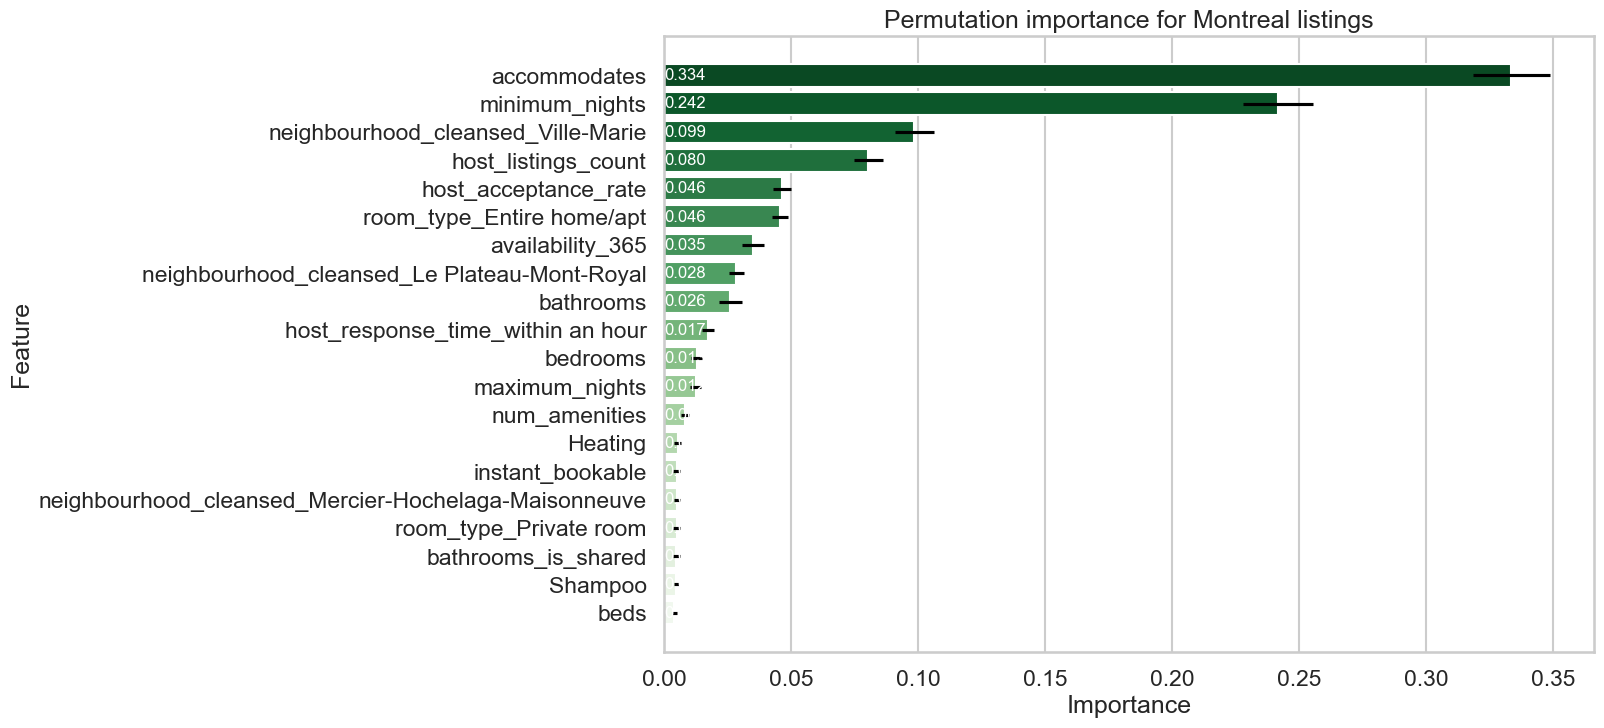

In [60]:
# Plot top 20 features
plt.figure(figsize=(12, 8))
ax = sns.barplot(
    data=permutation_importance_df.head(20),
    y="feature",
    x="importance_mean",
    palette="Greens_r",
)

for i in range(20):
    ax.errorbar(
        x=permutation_importance_df.iloc[i]["importance_mean"],
        y=i,
        xerr=permutation_importance_df.iloc[i]["importance_std"],
        fmt="none",
        c="black",
    )

    ax.text(
        0,
        i,
        f"{permutation_importance_df.iloc[i]['importance_mean']:.3f}",
        va="center",
        color="white",
        fontsize=12,
    )

ax.set_title(f"Permutation importance for {city.capitalize()} listings")
ax.set_ylabel("Feature")
ax.set_xlabel("Importance")
plt.show()

In [61]:
import joblib

joblib.dump(rf, f"./models/{city}_random_forest.joblib")
m = joblib.load(f"./models/{city}_random_forest.joblib")

In [62]:
with open(f'models/{city}_features_to_drop.txt', 'w') as f:
    for feature in features_to_drop:
        f.write(feature + '\n')